# Práctica de Machine Learning nº1
El objetivo de la prática consiste en clasificar y evaluar diferentes algoritmos de clasificación de ML.

Los datos son imágenes de escasa resolución de objetos reales (por ejemplo: un oso, un avión, un tren, etc.). Los datos están separados en varios ficheros:


```bash
├── batches.meta dispone de información descriptiva de las etiquetas usadas
├── data_batch_1  datos_lote_1
├── data_batch_2  datos_lote_2
├── data_batch_3  datos_lote_3
├── data_batch_4  datos_lote_4
├── data_batch_5  datos_lote_5
└── test_batch    muestras que podrían utilizarse como test
```

Estos ficheros se proporcionan en formato binario por su elevado tamaño.

A continuación, adjuntamos código para mostrar operaciones básicas de acceso a estos datos, formato y dimensión. 
Advertencia: tened en cuenta el 'path del fichero' a la hora de cargar cada uno de ellos.

**El resto del enunciado está al final del documento.**

In [3]:
# Librerías 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

#Función para la carga de datos. Formato binario propio de pandas: pickle
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

In [4]:
# Fichero 
data = unpickle("/users/BalentinaAE/PYTHON/Projects/Notebooks/data_batch_1")
print(data.keys())


print(len(data[b'labels']))
print(data[b'labels'][0])
print("*"*30)
print(data[b'data'][0])
print(len(data[b'data'][0]))
print(data[b'data'].shape)
print("*"*30)

print(len(data[b'batch_label']))
print(data[b'batch_label'])
print("*"*30)
print(len(data[b'filenames']))



dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
10000
6
******************************
[ 59  43  50 ... 140  84  72]
3072
(10000, 3072)
******************************
21
b'training batch 1 of 5'
******************************
10000


In [5]:
meta = unpickle("batches.meta")
print(meta.keys())

print(meta[b'num_cases_per_batch'])
print(meta[b'label_names'][0])

print("*"*30)


dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
10000
b'airplane'
******************************


In [6]:
# Cada entidad, se encuentra en una posición de cada uno de los anteriores atributos
# Vamos a ver la entidad '0'
d0 = data[b'data'][0]
print(len(d0))

3072


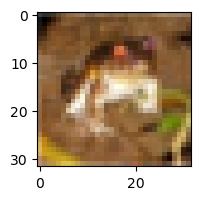

In [7]:
# Los datos de cada entidad contienen los valores de la imagen. La imagen se obtiene por la combinación de tres canales/capas (red, green, blue) de la siguiente forma:
ch0 = d0[0:1024]
ch1 = d0[1024:2048]
ch2 = d0[2048:]

# Cada canal es una capa del correspondiente color
ch0 = np.reshape(ch0, (32,32)) # red
ch1 = np.reshape(ch1, (32,32)) # green
ch2 = np.reshape(ch2, (32,32)) # blue

# La combinación de ellas da una imagen con los tres colores:
image = np.dstack((ch0, ch1, ch2))


fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image)
plt.show()

6
b'frog'
------------------------------


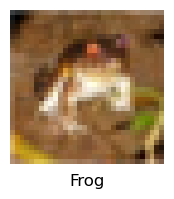

In [9]:
# La etiqueta y categoría de la entidad '0' están codificados en los atributos:
code_fine_label = data[b'labels'][0]
# Necesitamos la información del fichero META para poner nombre al código de la etiqueta
code_coarse_label = meta[b'label_names'][code_fine_label]
print(code_fine_label)
print(code_coarse_label)

print("-"*30)

fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image)
ax.set_title(code_coarse_label.decode("utf-8").capitalize(),y=-.2)
plt.axis('off')
plt.show()

## Enunciado

Se pide:
- 1. Analiza con mayor detalle la dimensionalidad de los datos. En esta sección se valorará el uso de gráficos.
- 2. Selecciona datos para entrenar un modelo de clasificación usando la librería scikit-learn con tan solo las entidades de tres categorías elegidas al azar por el sistema. Importante: si así lo considerás no hace falta que selecciones todas las muestras de esos tipos que hay en todos los lotes!
- 3. Aplica, configura y analiza los resultados tras aplicar los siguientes algoritmos de clasificación sobre los datos seleccionados previamente (se valorarán el estudio de diferentes parametrizaciones):
  - Support Vector Machine
  - Random Forest Classifier
  - K Neighbors Classifier
  - AdaBoots
- 4. Compara los resultados de los algoritmos. En esta sección se valorarán las visualizaciones.

Entrega:
- Solo está permitida la entrega de **un único** documento con formato notebook de jupyter (.ipynb) mediante su subida a la tarea en AulaDigital. Se espera un informe combinado de texto y código documentado.
  - Especificar en la primera celda del documento: nombre y apellidos.

  - Entregar el notebook con los resultados de su ejecución. 


Dimensiones 

C:\Users\BalentinaAE\AppData\Local\Temp\ipykernel_36404\26011315.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


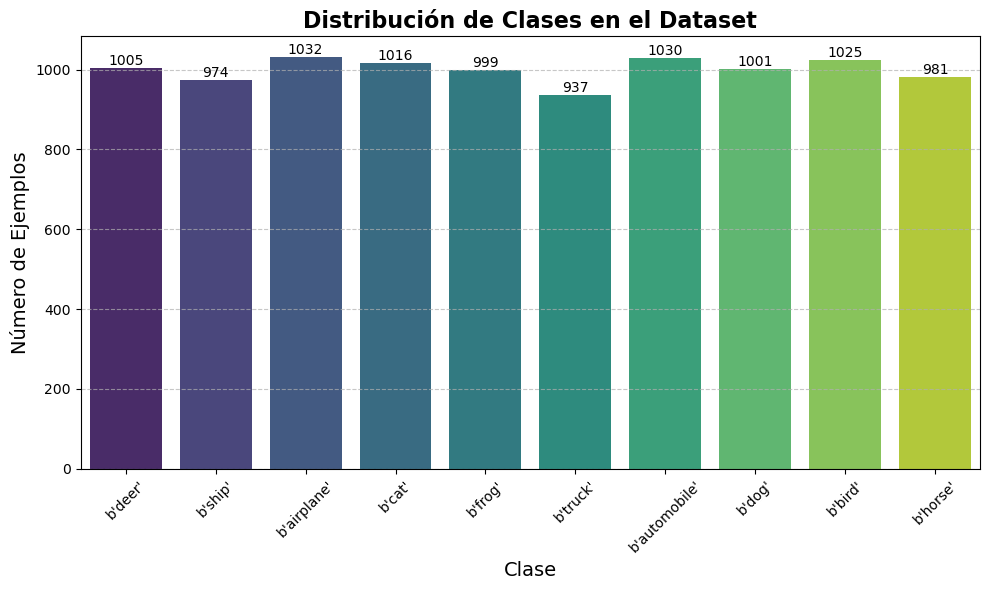

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

class_counts = pd.Series(data[b'labels']).value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')

plt.title('Distribución de Clases en el Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Número de Ejemplos', fontsize=14)
plt.xticks(ticks=class_counts.index, labels=meta[b'label_names'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()



In [48]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
labels = np.array(data[b'labels'])
label_names = np.array(meta[b'label_names'])

selected_labels = random.sample(list(set(labels)), 3)

mask = np.isin(labels, selected_labels)
X_selected = data[b'data'][mask]
y_selected = labels[mask]

df = pd.DataFrame(X_selected)
df['label'] = y_selected

ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)

X_sampled = sampled_df.drop('label', axis=1).to_numpy()
y_sampled = sampled_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("Datos seleccionados para entrenamiento:", X_train.shape)
print("Datos seleccionados para prueba:", X_test.shape)
print("Etiquetas seleccionadas (primeras 10):", y_train[:10])
print("Categorías seleccionadas:", label_names[selected_labels])



C:\Users\BalentinaAE\AppData\Local\Temp\ipykernel_36404\3784410763.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)


Datos seleccionados para entrenamiento: (360, 3072)
Datos seleccionados para prueba: (90, 3072)
Etiquetas seleccionadas (primeras 10): [3 3 3 3 4 3 3 9 9 9]
Categorías seleccionadas: [b'horse' b'frog' b'deer']


In [49]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

labels = np.array(data[b'labels'])
label_names = np.array(meta[b'label_names'])

selected_labels = random.sample(list(set(labels)), 3)

mask = np.isin(labels, selected_labels)
X_selected = data[b'data'][mask]
y_selected = labels[mask]

df = pd.DataFrame(X_selected)
df['label'] = y_selected

ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)

X_sampled = sampled_df.drop('label', axis=1).to_numpy()
y_sampled = sampled_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("Datos seleccionados para entrenamiento:", X_train.shape)
print("Datos seleccionados para prueba:", X_test.shape)
print("Etiquetas seleccionadas (primeras 10):", y_train[:10])
print("Categorías seleccionadas:", label_names[selected_labels])



Datos seleccionados para entrenamiento: (360, 3072)
Datos seleccionados para prueba: (90, 3072)
Etiquetas seleccionadas (primeras 10): [3 3 3 3 4 3 3 9 9 9]
Categorías seleccionadas: [b'frog' b'bird' b'cat']


C:\Users\BalentinaAE\AppData\Local\Temp\ipykernel_36404\1279995938.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)



              precision    recall  f1-score   support

           3       0.79      0.63      0.70        35
           4       0.59      0.83      0.69        23
           9       0.80      0.75      0.77        32

    accuracy                           0.72        90
   macro avg       0.73      0.73      0.72        90
weighted avg       0.74      0.72      0.72        90



In [51]:
from sklearn.svm import SVC

svm_model = SVC()  
svm_model.fit(X_train, y_train)  
y_pred_svm = svm_model.predict(X_test)  
print(classification_report(y_test, y_pred_svm))  
print(confusion_matrix(y_test, y_pred_svm))  


              precision    recall  f1-score   support

           3       0.73      0.54      0.62        35
           4       0.56      0.78      0.65        23
           9       0.78      0.78      0.78        32

    accuracy                           0.69        90
   macro avg       0.69      0.70      0.69        90
weighted avg       0.71      0.69      0.69        90

[[19 11  5]
 [ 3 18  2]
 [ 4  3 25]]


In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()  
knn_model.fit(X_train, y_train)  
y_pred_knn = knn_model.predict(X_test)  
print(classification_report(y_test, y_pred_knn))  
print(confusion_matrix(y_test, y_pred_knn))  


              precision    recall  f1-score   support

           3       0.60      0.17      0.27        35
           4       0.33      0.91      0.49        23
           9       0.94      0.50      0.65        32

    accuracy                           0.48        90
   macro avg       0.62      0.53      0.47        90
weighted avg       0.65      0.48      0.46        90

[[ 6 29  0]
 [ 1 21  1]
 [ 3 13 16]]


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_model = AdaBoostClassifier()  
ada_model.fit(X_train, y_train)  
y_pred_ada = ada_model.predict(X_test)  
print(classification_report(y_test, y_pred_ada))  
print(confusion_matrix(y_test, y_pred_ada))  


c:\Users\BalentinaAE\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           3       0.66      0.71      0.68        35
           4       0.52      0.65      0.58        23
           9       0.87      0.62      0.73        32

    accuracy                           0.67        90
   macro avg       0.68      0.66      0.66        90
weighted avg       0.70      0.67      0.67        90

[[25  9  1]
 [ 6 15  2]
 [ 7  5 20]]


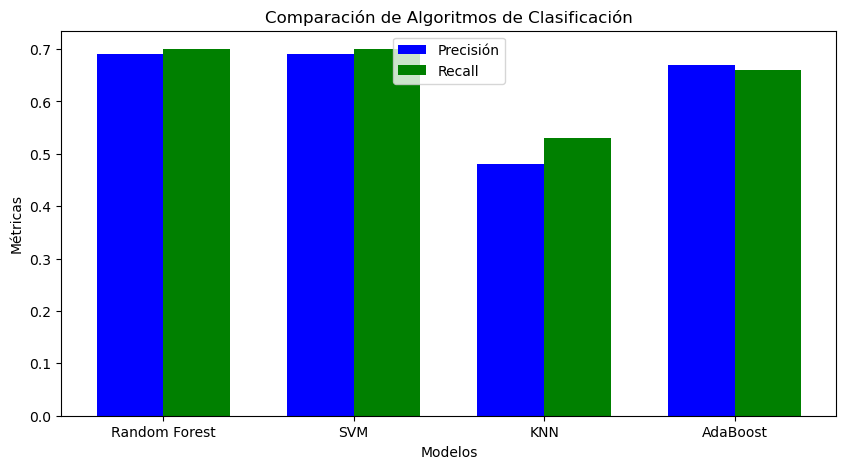

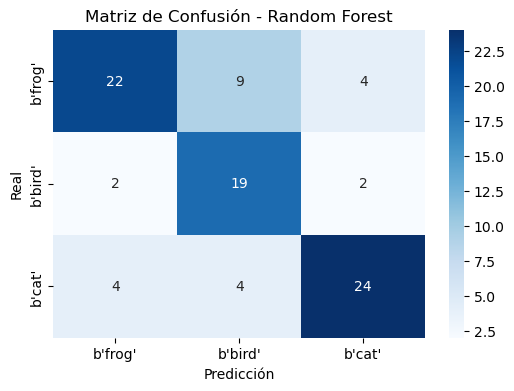

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Random Forest', 'SVM', 'KNN', 'AdaBoost']
precision = [0.69, 0.69, 0.48, 0.67]
recall = [0.70, 0.70, 0.53, 0.66]

plt.figure(figsize=(10, 5))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x, precision, width=bar_width, label='Precisión', color='b')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall', color='g')

plt.xlabel('Modelos')
plt.xticks(x + bar_width / 2, models)
plt.ylabel('Métricas')
plt.title('Comparación de Algoritmos de Clasificación')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_names[selected_labels], yticklabels=label_names[selected_labels])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Al comparar los resultados de los modelos de clasificación, Random Forest y Support Vector Machine (SVM) muestran un rendimiento similar, ambos con una precisión del 69%. Random Forest destaca en la clase 9 con un 81% de precisión, pero tiene un bajo desempeño en la clase 4 (52%). Por su parte, SVM también identifica bien la clase 9, alcanzando un 78% de precisión y un buen recall para la clase 4 (78%). En contraste, K-Nearest Neighbors (KNN) presenta un rendimiento bajo con un 48% de precisión general y un recall de solo 17% en la clase 3. AdaBoost muestra un rendimiento aceptable con un 67% de precisión.